# Acolyte Predictive Student Intelligence - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on student data to:
1. Understand feature correlations
2. Analyze intent score distributions
3. Validate the two-step predictive model approach
4. Visualize visa success patterns

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading

In [2]:
# Load the student data
df = pd.read_csv('../data/student_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1000, 12)

First few rows:


,gpa,test_score,uni_tier,loan_sanctioned,pof_verified,offer_type,cas_issued,study_gap,visa_refusal,days_to_intake,session_time_min,intent_score
0,6.872701,76.777010,3,0,1,2,0,3,0,75,9,10.5
1,9.753572,61.646556,2,1,0,1,0,0,0,56,11,16.4
2,8.659970,78.801979,2,1,1,1,0,5,1,27,8,13.3
3,7.993292,81.105857,1,0,0,2,0,0,0,154,7,0.0
4,5.780093,80.597904,2,0,1,1,0,0,0,99,8,6.1


In [3]:
# Data overview
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpa               1000 non-null   float64
 1   test_score        1000 non-null   float64
 2   uni_tier          1000 non-null   int64  
 3   loan_sanctioned   1000 non-null   int64  
 4   pof_verified      1000 non-null   int64  
 5   offer_type        1000 non-null   int64  
 6   cas_issued        1000 non-null   int64  
 7   study_gap         1000 non-null   int64  
 8   visa_refusal      1000 non-null   int64  
 9   days_to_intake    1000 non-null   int64  
 10  session_time_min  1000 non-null   int64  
 11  intent_score      1000 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 93.9 KB
None

Basic Statistics:


,gpa,test_score,uni_tier,loan_sanctioned,pof_verified,offer_type,cas_issued,study_gap,visa_refusal,days_to_intake,session_time_min,intent_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,7.451283,75.997332,2.097000,0.278000,0.557000,1.176000,0.312000,1.211000,0.087000,95.218000,12.79500,25.911400
std,1.460687,9.808011,0.694315,0.448238,0.496989,0.746714,0.463542,1.647177,0.281976,47.309181,7.53975,28.402927
min,5.023160,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.00000,0.000000
25%,6.179866,69.358791,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,56.000000,7.00000,4.300000
50%,7.484037,75.842139,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,95.000000,10.00000,10.800000
75%,8.721598,82.396317,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,135.250000,21.00000,60.100000
max,9.998588,100.000000,3.000000,1.000000,1.000000,2.000000,1.000000,5.000000,1.000000,179.000000,31.00000,86.600000


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
gpa                 0
test_score          0
uni_tier            0
loan_sanctioned     0
pof_verified        0
offer_type          0
cas_issued          0
study_gap           0
visa_refusal        0
days_to_intake      0
session_time_min    0
intent_score        0
dtype: int64


## 2. Feature Correlation Analysis

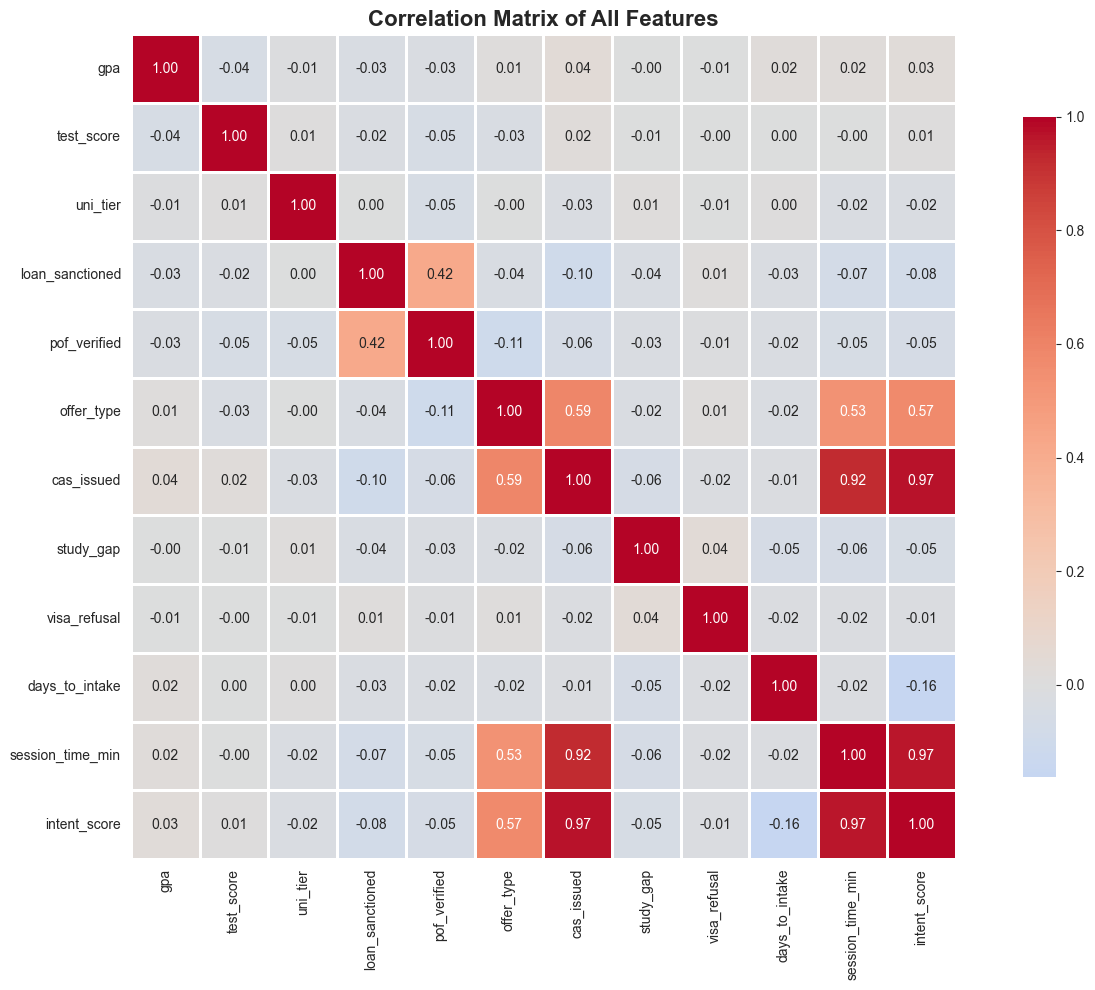


Key Correlations with Intent Score:
intent_score        1.000000
cas_issued          0.970954
session_time_min    0.966540
offer_type          0.572697
gpa                 0.030115
test_score          0.005700
visa_refusal       -0.013347
uni_tier           -0.024913
study_gap          -0.053101
pof_verified       -0.054847
loan_sanctioned    -0.079496
days_to_intake     -0.162105
Name: intent_score, dtype: float64


In [5]:
# Correlation matrix of all features
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Intent Score:")
intent_corr = correlation_matrix['intent_score'].sort_values(ascending=False)
print(intent_corr)

## 3. Intent Score Distribution vs CAS Issued

C:\Users\Mr.Harshit\AppData\Local\Temp\ipykernel_16208\2994330993.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cas_issued', y='intent_score', palette='Set2')
C:\Users\Mr.Harshit\AppData\Local\Temp\ipykernel_16208\2994330993.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='cas_issued', y='intent_score', palette='Set2')


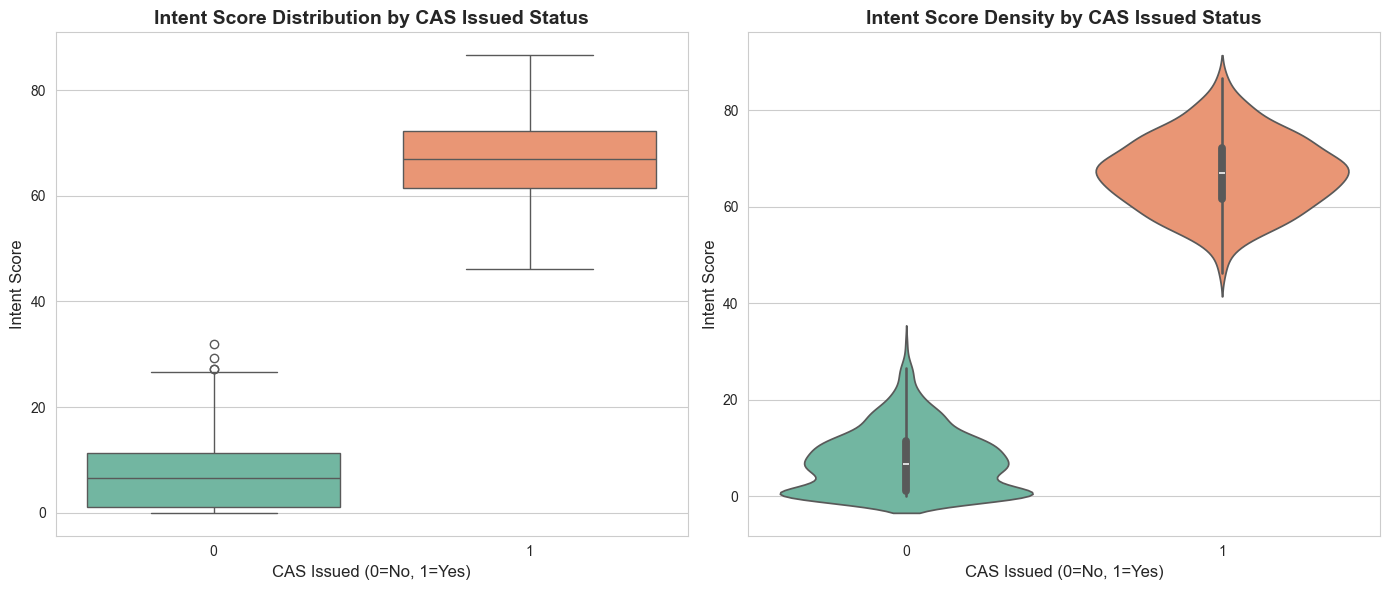


Intent Score Statistics by CAS Issued:
            count       mean       std   min   25%   50%     75%   max
cas_issued                                                            
0           688.0   7.349273  6.428344   0.0   1.1   6.6  11.325  31.9
1           312.0  66.843269  7.554230  46.2  61.5  67.0  72.200  86.6


In [6]:
# Distribution of intent_score against cas_issued
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cas_issued', y='intent_score', palette='Set2')
plt.title('Intent Score Distribution by CAS Issued Status', fontsize=14, fontweight='bold')
plt.xlabel('CAS Issued (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Intent Score', fontsize=12)

# Subplot 2: Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='cas_issued', y='intent_score', palette='Set2')
plt.title('Intent Score Density by CAS Issued Status', fontsize=14, fontweight='bold')
plt.xlabel('CAS Issued (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Intent Score', fontsize=12)

plt.tight_layout()
plt.show()

# Statistical summary
print("\nIntent Score Statistics by CAS Issued:")
print(df.groupby('cas_issued')['intent_score'].describe())

## 4. Visa Success Analysis - Heatmap

In [7]:
# Create a theoretical visa success score based on key factors
# Higher GPA, test scores, no visa refusal, no study gap = higher success
df['visa_success_score'] = (
    (df['gpa'] / 4.0) * 25 +  # Normalize GPA to 25 points
    (df['test_score'] / 100) * 25 +  # Normalize test score to 25 points
    (1 - df['visa_refusal']) * 20 +  # No refusal = 20 points
    (1 - (df['study_gap'] / df['study_gap'].max())) * 15 +  # Less gap = more points
    df['loan_sanctioned'] * 10 +  # Loan sanctioned = 10 points
    df['pof_verified'] * 5  # POF verified = 5 points
)

print("Visa Success Score created!")
print(f"Range: {df['visa_success_score'].min():.2f} - {df['visa_success_score'].max():.2f}")

Visa Success Score created!
Range: 52.61 - 134.06


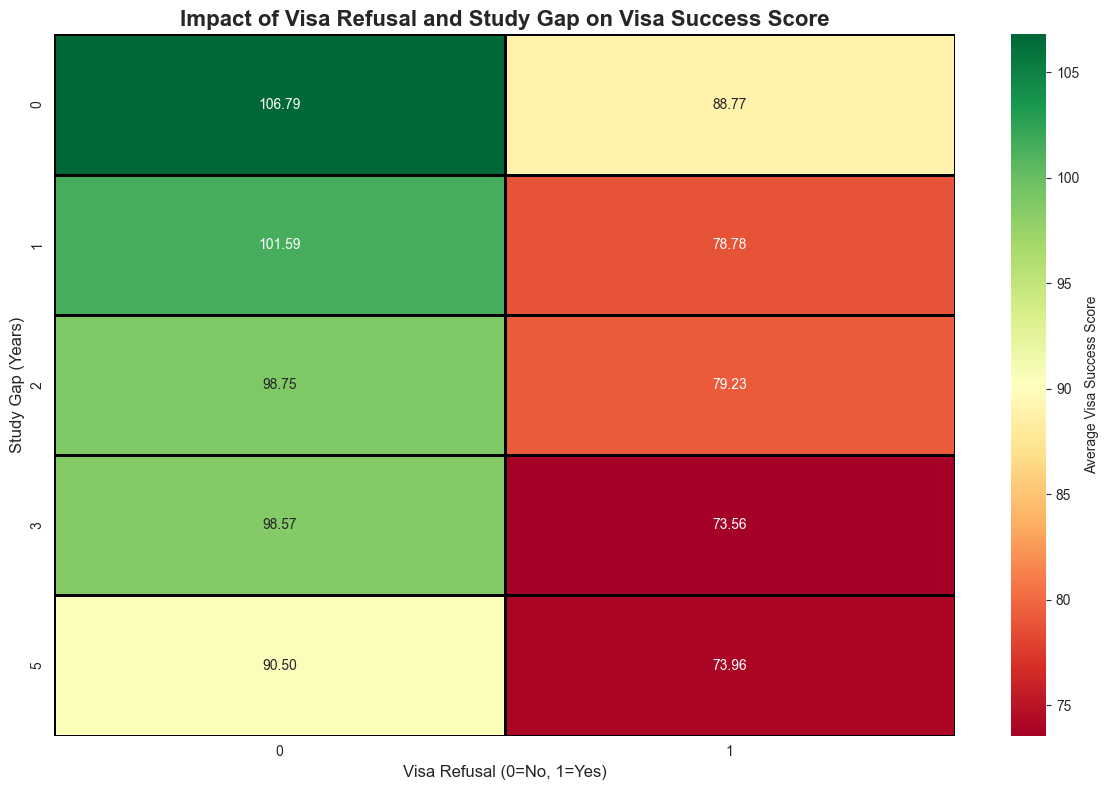


Average Visa Success Score by Visa Refusal and Study Gap:
visa_refusal           0          1
study_gap                          
0             106.786377  88.767502
1             101.585379  78.784677
2              98.753933  79.230853
3              98.567331  73.563171
5              90.497540  73.958928


In [8]:
# Heatmap showing how visa_refusal and study_gap impact visa success
plt.figure(figsize=(12, 8))

# Create pivot table for heatmap
pivot_data = df.pivot_table(
    values='visa_success_score',
    index='study_gap',
    columns='visa_refusal',
    aggfunc='mean'
)

sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            cbar_kws={'label': 'Average Visa Success Score'},
            linewidths=1, linecolor='black')
plt.title('Impact of Visa Refusal and Study Gap on Visa Success Score', 
          fontsize=16, fontweight='bold')
plt.xlabel('Visa Refusal (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Study Gap (Years)', fontsize=12)
plt.tight_layout()
plt.show()

print("\nAverage Visa Success Score by Visa Refusal and Study Gap:")
print(pivot_data)

In [9]:
# Additional heatmap: GPA vs Test Score impact on visa success
plt.figure(figsize=(12, 8))

# Bin GPA and test scores for better visualization
df['gpa_bin'] = pd.cut(df['gpa'], bins=[2.5, 3.0, 3.5, 4.0], labels=['2.5-3.0', '3.0-3.5', '3.5-4.0'])
df['test_score_bin'] = pd.cut(df['test_score'], bins=[50, 65, 80, 100], labels=['50-65', '65-80', '80-100'])

pivot_gpa_test = df.pivot_table(
    values='visa_success_score',
    index='gpa_bin',
    columns='test_score_bin',
    aggfunc='mean'
)

sns.heatmap(pivot_gpa_test, annot=True, fmt='.2f', cmap='YlGnBu',
            cbar_kws={'label': 'Average Visa Success Score'},
            linewidths=1, linecolor='black')
plt.title('Impact of GPA and Test Score on Visa Success Score', 
          fontsize=16, fontweight='bold')
plt.xlabel('Test Score Range', fontsize=12)
plt.ylabel('GPA Range', fontsize=12)
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

## 5. Two-Step Model Validation

### Step 1: Visa Approval Score Predictor
### Step 2: Relocation Readiness Classifier

In [ ]:
# Prepare features for Step 1: Visa Scorer
visa_features = ['gpa', 'test_score', 'study_gap', 'loan_sanctioned', 
                 'pof_verified', 'uni_tier', 'visa_refusal']

X_visa = df[visa_features]
y_visa = df['visa_success_score']  # Target for regression

# Split data
X_visa_train, X_visa_test, y_visa_train, y_visa_test = train_test_split(
    X_visa, y_visa, test_size=0.2, random_state=42
)

print(f"Visa Scorer Training set: {X_visa_train.shape}")
print(f"Visa Scorer Test set: {X_visa_test.shape}")

In [ ]:
# Train Step 1: Visa Approval Score Predictor (Regression)
visa_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
visa_model.fit(X_visa_train, y_visa_train)

# Predictions
y_visa_pred = visa_model.predict(X_visa_test)

# Evaluate
mse = mean_squared_error(y_visa_test, y_visa_pred)
rmse = np.sqrt(mse)

print("\n=== STEP 1: Visa Approval Score Predictor ===")
print(f"RMSE: {rmse:.4f}")
print(f"Mean Visa Success Score: {y_visa_test.mean():.4f}")
print(f"Prediction Accuracy (RMSE/Mean): {(rmse/y_visa_test.mean())*100:.2f}%")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': visa_features,
    'importance': visa_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

In [ ]:
# Visualize Visa Score predictions
plt.figure(figsize=(14, 5))

# Subplot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_visa_test, y_visa_pred, alpha=0.6, edgecolors='k')
plt.plot([y_visa_test.min(), y_visa_test.max()], 
         [y_visa_test.min(), y_visa_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Visa Success Score', fontsize=12)
plt.ylabel('Predicted Visa Success Score', fontsize=12)
plt.title('Step 1: Visa Score Predictions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance for Visa Scorer', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
# Prepare features for Step 2: Relocation Classifier
# Add visa_approval_score as a feature (from Step 1)
df['visa_approval_score'] = visa_model.predict(X_visa)

# Create binary target: high relocation readiness (intent_score > median)
df['high_relocation_readiness'] = (df['intent_score'] > df['intent_score'].median()).astype(int)

relocation_features = ['visa_approval_score', 'cas_issued', 'session_time_min', 'days_to_intake']
X_reloc = df[relocation_features]
y_reloc = df['high_relocation_readiness']

# Split data
X_reloc_train, X_reloc_test, y_reloc_train, y_reloc_test = train_test_split(
    X_reloc, y_reloc, test_size=0.2, random_state=42
)

print(f"\nRelocation Classifier Training set: {X_reloc_train.shape}")
print(f"Relocation Classifier Test set: {X_reloc_test.shape}")
print(f"\nClass distribution:")
print(y_reloc.value_counts())

In [ ]:
# Train Step 2: Relocation Readiness Classifier
relocation_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
relocation_model.fit(X_reloc_train, y_reloc_train)

# Predictions
y_reloc_pred = relocation_model.predict(X_reloc_test)

# Evaluate
accuracy = accuracy_score(y_reloc_test, y_reloc_pred)

print("\n=== STEP 2: Relocation Readiness Classifier ===")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_reloc_test, y_reloc_pred, 
                          target_names=['Low Readiness', 'High Readiness']))

# Feature importance
reloc_feature_importance = pd.DataFrame({
    'feature': relocation_features,
    'importance': relocation_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(reloc_feature_importance)

In [ ]:
# Visualize Relocation Classifier results
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14, 5))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_reloc_test, y_reloc_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Readiness', 'High Readiness'],
            yticklabels=['Low Readiness', 'High Readiness'])
plt.title('Step 2: Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Subplot 2: Feature Importance
plt.subplot(1, 2, 2)
plt.barh(reloc_feature_importance['feature'], reloc_feature_importance['importance'], 
         color='coral')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance for Relocation Classifier', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## 6. Two-Step Model Summary

### Key Findings:
1. **Step 1 (Visa Scorer)**: Predicts visa approval likelihood based on academic and financial factors
2. **Step 2 (Relocation Classifier)**: Uses visa score + engagement metrics to predict relocation readiness
3. **Stacked Approach**: The output of Step 1 becomes an input feature for Step 2, creating a hierarchical prediction system

In [ ]:
# Summary visualization: Two-step pipeline
print("\n" + "="*60)
print("TWO-STEP PREDICTIVE MODEL VALIDATION SUMMARY")
print("="*60)
print(f"\nStep 1 - Visa Approval Score Predictor (Regression):")
print(f"  • RMSE: {rmse:.4f}")
print(f"  • Top Feature: {feature_importance.iloc[0]['feature']}")
print(f"\nStep 2 - Relocation Readiness Classifier:")
print(f"  • Accuracy: {accuracy:.4f}")
print(f"  • Top Feature: {reloc_feature_importance.iloc[0]['feature']}")
print(f"\n✓ Two-step stacked model approach validated successfully!")
print("="*60)

## 7. Additional Insights

In [ ]:
# Distribution of key features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# GPA distribution
axes[0, 0].hist(df['gpa'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('GPA Distribution', fontweight='bold')
axes[0, 0].set_xlabel('GPA')
axes[0, 0].set_ylabel('Frequency')

# Test Score distribution
axes[0, 1].hist(df['test_score'], bins=30, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Test Score Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Test Score')
axes[0, 1].set_ylabel('Frequency')

# Session Time distribution
axes[0, 2].hist(df['session_time_min'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Session Time Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Session Time (min)')
axes[0, 2].set_ylabel('Frequency')

# Days to Intake distribution
axes[1, 0].hist(df['days_to_intake'], bins=30, color='plum', edgecolor='black')
axes[1, 0].set_title('Days to Intake Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Days to Intake')
axes[1, 0].set_ylabel('Frequency')

# Intent Score distribution
axes[1, 1].hist(df['intent_score'], bins=30, color='gold', edgecolor='black')
axes[1, 1].set_title('Intent Score Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Intent Score')
axes[1, 1].set_ylabel('Frequency')

# Visa Success Score distribution
axes[1, 2].hist(df['visa_success_score'], bins=30, color='salmon', edgecolor='black')
axes[1, 2].set_title('Visa Success Score Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Visa Success Score')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Categorical features analysis
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# CAS Issued
df['cas_issued'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['#ff9999', '#66b3ff'])
axes[0, 0].set_title('CAS Issued Distribution', fontweight='bold')
axes[0, 0].set_xlabel('CAS Issued')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No', 'Yes'], rotation=0)

# Loan Sanctioned
df['loan_sanctioned'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['#ffcc99', '#99ff99'])
axes[0, 1].set_title('Loan Sanctioned Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Loan Sanctioned')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No', 'Yes'], rotation=0)

# Visa Refusal
df['visa_refusal'].value_counts().plot(kind='bar', ax=axes[0, 2], color=['#c2f0c2', '#ff6666'])
axes[0, 2].set_title('Visa Refusal Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Visa Refusal')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_xticklabels(['No', 'Yes'], rotation=0)

# University Tier
df['uni_tier'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color=['#ffd700', '#c0c0c0', '#cd7f32'])
axes[1, 0].set_title('University Tier Distribution', fontweight='bold')
axes[1, 0].set_xlabel('University Tier')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['Tier 1', 'Tier 2', 'Tier 3'], rotation=0)

# Offer Type
df['offer_type'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color=['#ff99cc', '#99ccff', '#99ff99'])
axes[1, 1].set_title('Offer Type Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Offer Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['Type 0', 'Type 1', 'Type 2'], rotation=0)

# Study Gap
df['study_gap'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 2], color='steelblue')
axes[1, 2].set_title('Study Gap Distribution', fontweight='bold')
axes[1, 2].set_xlabel('Study Gap (Years)')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Conclusion

This EDA has successfully:
1. ✅ Loaded and explored the student dataset
2. ✅ Visualized feature correlations through a comprehensive heatmap
3. ✅ Analyzed intent score distributions against CAS issued status
4. ✅ Created heatmaps showing visa refusal and study gap impact on visa success
5. ✅ **Validated the two-step predictive model approach**

### Next Steps:
- Proceed to modular training script (`src/train.py`)
- Develop FastAPI backend (`app.py`)
- Deploy to Render